This documents shows how to see the results from the simulations and optimizations done by the NOAH RTC Tool. 

In [1]:
import swmmtoolbox.swmmtoolbox as swmmtoolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In the following the parameters needed to show the results are defined. 

In [2]:
CSO_ids = ['T1','T3','T6'] # The CSO'ids that are to be shown. These should be the same as the ones used for the objective function in the optimization. 
outfile = 'Astlingen.out' # The output file with the results
timesteps = 5*60 # The length of the time steps in seconds This requires that all timesteps have same length.
variable = 'Flow_lost_flooding' # The variable to be plotted. For more options see: 
# swmmtoolbox.listvariables(outfile)

## Reading .pickle file

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
pickle_in = open("First_step_simulations.pickle","rb")
df = pickle.load(pickle_in)
df

,starting points,objective values
0,0.0,366806.876710
1,0.6,158133.758869
2,1.2,117871.300752
3,1.8,100592.977631
4,2.4,89990.053683
5,3.0,82939.997857
6,3.6,77083.434956
7,4.2,73404.892604
8,4.8,69290.231407
9,5.4,77803.027641


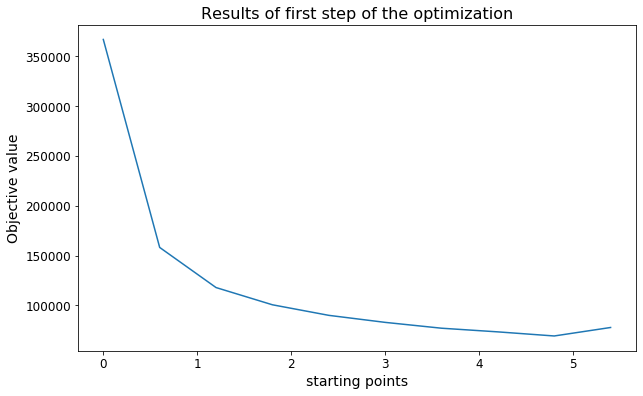

In [4]:
size = 14 # fontsize

plt.figure(figsize = (10,6))
plt.plot(df['starting points'],df['objective values'])
plt.title('Results of first step of the optimization',fontsize = size+2)
plt.xlabel('starting points',fontsize = size)
plt.xticks(fontsize = size-2)
plt.ylabel('Objective value',fontsize = size)
plt.yticks(fontsize = size-2)
# plt.legend()
plt.show()

## Showing time series of the simulation from the .out file

In [5]:
df = pd.concat(((swmmtoolbox.extract(outfile,['node',CSO_ids[i],variable]))for i in range(len(CSO_ids))),axis = 1)
df.head()

C:\Users\magnu\AppData\Local\Continuum\anaconda3\envs\NOAH\lib\site-packages\swmmtoolbox\swmmtoolbox.py:800: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  result = pd.concat(jtsd, axis=1, join_axes=[jtsd[0].index])


,node_T1_Flow_lost_flooding,node_T3_Flow_lost_flooding,node_T6_Flow_lost_flooding
2000-05-01 00:05:00,0.0,0.0,0.0
2000-05-01 00:10:00,0.0,0.0,0.0
2000-05-01 00:15:00,0.0,0.0,0.0
2000-05-01 00:20:00,0.0,0.0,0.0
2000-05-01 00:25:00,0.0,0.0,0.0


C:\Users\magnu\AppData\Local\Continuum\anaconda3\envs\NOAH\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


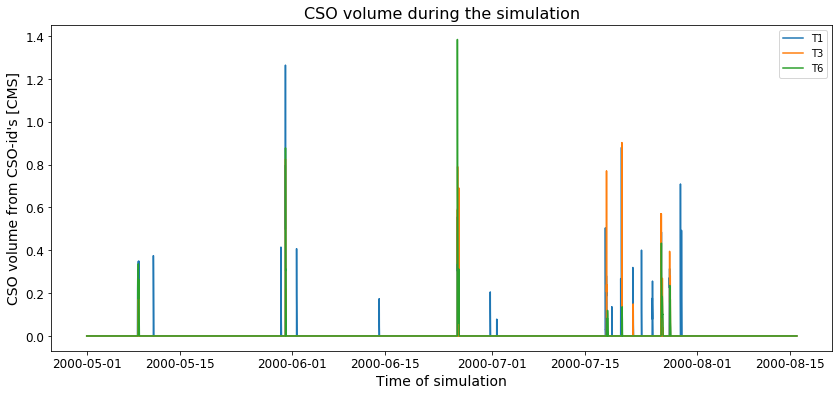

In [6]:
size = 14 # fontsize

plt.figure(figsize = (14,6))
for i in range(len(CSO_ids)):
    plt.plot(df.index,df.iloc[:,i],label =CSO_ids[i])
plt.title('CSO volume during the simulation',fontsize = size+2)
plt.xlabel('Time of simulation',fontsize = size)
plt.xticks(fontsize = size-2)
plt.ylabel("CSO volume from CSO-id's [CMS]",fontsize = size)
plt.yticks(fontsize = size-2)
plt.legend()
plt.show()

## Computing CSO volume

In [7]:
CSO_volumne = (df*timesteps).sum()
total_CSO_volumne = CSO_volumne.sum()

print('Total CSO volume is {:.0f} m3\n'.format(total_CSO_volumne))
print("For the different CSO-id's this is:")
for  i in range(len(CSO_ids)):
    print('The  CSO volume of {} is {:.0f} m3'.format(CSO_ids[i],CSO_volumne[i]))

Total CSO volume is 68514 m3

For the different CSO-id's this is:
The  CSO volume of T1 is 34436 m3
The  CSO volume of T3 is 13690 m3
The  CSO volume of T6 is 20388 m3


From these results it can be seen how the first step of the optimization computes 10 different simulations and finds that the lowest one is at starting point 4.8. The flooding volume is here 69290 m3. <br> 
From here the optimization algorithms further reduces the CSO volume to 68514 m3. 